# HR Company has hired you as ML expert to create a model that can predict the salary of the employee based on his/her YearsofExp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset\\Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,3.934300e+04
1,1.3,4.620500e+04
2,1.5,3.773100e+04
3,2.0,4.352500e+04
4,2.2,3.989100e+04
5,2.9,5.664200e+04
6,3.0,6.015000e+04
7,3.2,5.444500e+04
8,3.2,6.444500e+04
9,3.7,5.718900e+04


In [3]:
data.describe()

,YearsExperience,Salary
count,31.000000,3.100000e+01
mean,8.367742,3.580719e+09
std,17.233599,1.993617e+10
min,1.100000,3.773100e+04
25%,3.200000,5.679950e+04
50%,4.900000,6.602900e+04
75%,8.050000,1.034420e+05
max,100.000000,1.110000e+11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
YearsExperience    31 non-null float64
Salary             31 non-null float64
dtypes: float64(2)
memory usage: 624.0 bytes


In [5]:
# Seperate your data as Features and Lable
features = data.iloc[:,0].values
features

array([  1.1,   1.3,   1.5,   2. ,   2.2,   2.9,   3. ,   3.2,   3.2,
         3.7,   3.9,   4. ,   4. ,   4.1,   4.5,   4.9,   5.1,   5.3,
         5.9,   6. ,   6.8,   7.1,   7.9,   8.2,   8.7,   9. ,   9.5,
         9.6,  10.3,  10.5, 100. ])

In [6]:
label = data.iloc[:,1].values
label

array([3.93430e+04, 4.62050e+04, 3.77310e+04, 4.35250e+04, 3.98910e+04,
       5.66420e+04, 6.01500e+04, 5.44450e+04, 6.44450e+04, 5.71890e+04,
       6.32180e+04, 5.57940e+04, 5.69570e+04, 5.70810e+04, 6.11110e+04,
       6.79380e+04, 6.60290e+04, 8.30880e+04, 8.13630e+04, 9.39400e+04,
       9.17380e+04, 9.82730e+04, 1.01302e+05, 1.13812e+05, 1.09431e+05,
       1.05582e+05, 1.16969e+05, 1.12635e+05, 1.22391e+05, 1.21872e+05,
       1.11000e+11])

In [7]:
# Rule when working Regression using sklearn
# SKLearn expects your features and lebel to be in 2d form
print(features.shape)
print(label.shape)

(31,)
(31,)


In [8]:
features = features.reshape(-1,1)
label = label.reshape(-1,1)
print(features.shape)
print(label.shape)

(31, 1)
(31, 1)


In [9]:
features # convert in 2D

array([[  1.1],
       [  1.3],
       [  1.5],
       [  2. ],
       [  2.2],
       [  2.9],
       [  3. ],
       [  3.2],
       [  3.2],
       [  3.7],
       [  3.9],
       [  4. ],
       [  4. ],
       [  4.1],
       [  4.5],
       [  4.9],
       [  5.1],
       [  5.3],
       [  5.9],
       [  6. ],
       [  6.8],
       [  7.1],
       [  7.9],
       [  8.2],
       [  8.7],
       [  9. ],
       [  9.5],
       [  9.6],
       [ 10.3],
       [ 10.5],
       [100. ]])

In [10]:
label  # convert in 2D

array([[3.93430e+04],
       [4.62050e+04],
       [3.77310e+04],
       [4.35250e+04],
       [3.98910e+04],
       [5.66420e+04],
       [6.01500e+04],
       [5.44450e+04],
       [6.44450e+04],
       [5.71890e+04],
       [6.32180e+04],
       [5.57940e+04],
       [5.69570e+04],
       [5.70810e+04],
       [6.11110e+04],
       [6.79380e+04],
       [6.60290e+04],
       [8.30880e+04],
       [8.13630e+04],
       [9.39400e+04],
       [9.17380e+04],
       [9.82730e+04],
       [1.01302e+05],
       [1.13812e+05],
       [1.09431e+05],
       [1.05582e+05],
       [1.16969e+05],
       [1.12635e+05],
       [1.22391e+05],
       [1.21872e+05],
       [1.11000e+11]])

In [11]:
# Create training and testing set
# Training set will be used to test our model (learning)
# Testing set will be used to test our model accuracy/genralization (testing)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=1)

In [12]:
#Now we will create our Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train) # training my model & Creating intercept and coefficent

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#Check the generalization
print(lr.score(X_train, y_train)) #Known data
print(lr.score(X_test, y_test)) #Unknown data

0.9798267374270445
-24621792076.764664


In [14]:
#if your training score is less than testing score, you can conclude that your model is Genaralized Model
# Here above is NOT Generlized model due to Outlier so will remove the Outlier by technique

In [15]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    IQR = Q3-Q1
    lower_range = Q1- (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [16]:
l,u = outlier_treatment(data.Salary)

In [17]:
l

-13164.25

In [18]:
u

173405.75

In [19]:
data.drop(data[ (data.Salary > u) | (data.Salary < l) ].index , inplace=True)
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [20]:
# Seperate your data as Features and Lable
features = data.iloc[:,0].values
features

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [21]:
label = data.iloc[:,1].values
label

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [22]:
# Rule when working Regression using sklearn
# SKLearn expects your features and lebel to be in 2d form
print(features.shape)
print(label.shape)

(30,)
(30,)


In [23]:
features = features.reshape(-1,1)
label = label.reshape(-1,1)
print(features.shape)
print(label.shape)

(30, 1)
(30, 1)


In [24]:
features # convert in 2D

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [25]:

# Create training and testing set
# Training set will be used to test our model (learning)
# Testing set will be used to test our model accuracy/genralization (testing)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=30) # here made the change from randome_state from 1 to 10

In [26]:
#Now we will create our Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train) # training my model & Creating intercept and coefficent

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#Check the generalization
print(lr.score(X_train, y_train)) #Known data
print(lr.score(X_test, y_test)) #Unknown data

0.9400496694274888
0.9944092048209744


In [28]:
#if your training score is less than testing score, you can conclude that your model is Genaralized Model
# Here above is NOT Generlized model due to Outlier so will remove the Outlier by technique

In [29]:
#Technique to do experimental trail and error to find out best random_state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for i in range(1,101):
    X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    if train_score < test_score:
        print('Train Score:{} Test Score:{} Random Seed : {}'.format(train_score,test_score,i))

Train Score:0.9545249190394052 Test Score:0.9695039421049821 Random Seed : 3
Train Score:0.9528197369259258 Test Score:0.9631182154839475 Random Seed : 8
Train Score:0.9494673013344644 Test Score:0.9816423482070255 Random Seed : 10
Train Score:0.9527636176933665 Test Score:0.9606215790278543 Random Seed : 14
Train Score:0.9460054870434312 Test Score:0.9835849730044817 Random Seed : 26
Train Score:0.9527636606684406 Test Score:0.9636425773684422 Random Seed : 27
Train Score:0.9400496694274888 Test Score:0.9944092048209744 Random Seed : 30
Train Score:0.9486350116716654 Test Score:0.9778242092591887 Random Seed : 37
Train Score:0.9473317052697812 Test Score:0.9724794487377619 Random Seed : 38
Train Score:0.9492886917497556 Test Score:0.9928344802911049 Random Seed : 39
Train Score:0.9491742100347064 Test Score:0.9802519469633169 Random Seed : 41
Train Score:0.948821675263085 Test Score:0.9789129767378081 Random Seed : 46
Train Score:0.9486450781125914 Test Score:0.98399193890564 Random S

In [30]:
# From above we know will give best value for random state = 30 so we will change it
# Now deploy the model
import pickle
pickle.dump(lr,open('SalaryPredictor.model','wb'))

In [37]:
#Equation 

#Salary = b0 + b1(yearExper)   ## b0=intercept and b1=coeffceint
print("The equation of regression line is Salary = {} + {}*YearsExperience".format(lr.intercept_,lr.coef_))

The equation of regression line is Salary = [26819.0651187] + [[9361.11639032]]*YearsExperience


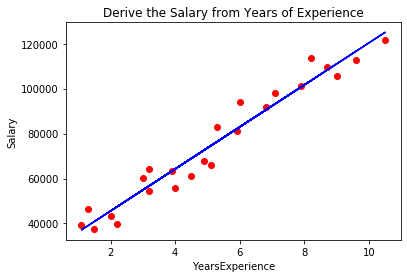

In [32]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_train, lin_reg.predict(X_train), color='blue')
    plt.title('Derive the Salary from Years of Experience')
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()